In [119]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

#### Đọc dữ liệu

In [120]:
df = pd.read_csv('OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu

In [121]:
df.info()
# Các cột bị missing value đó là cột Description, CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [122]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [123]:
# kiểm tra các phần tử khuyết thiếu
df.isna().sum()
# Cột Description có 1454 dòng có giá trị khuyết thiếu
# Cột CustomerID có 135080 dòng có giá trị khuyết thiếu

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao

In [124]:
df1 = df.dropna()

In [125]:
100*df1.shape[0]/df.shape[0]

75.0733056657114

In [126]:
# Ta sẽ xoá các dòng dữ liệu khuyết thiếu bởi vì ở cột CustomerID thì mỗi mã khách là duy nhất ta không thể fillna được
# Ta thấy dữ liệu sau khi drop thì còn lại 75% so với dữ liệu ban đầu

#### Thực hiện xử lý giá trị khuyết thiếu

In [127]:
#  Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”
df['Description'] = df['Description'].fillna('Không biết')

In [128]:
df[df['Description'] == 'Không biết']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Không biết,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,Không biết,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,Không biết,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,Không biết,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,Không biết,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,Không biết,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,Không biết,27,12/8/2011 10:33,0.0,NaN,United Kingdom


#### Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

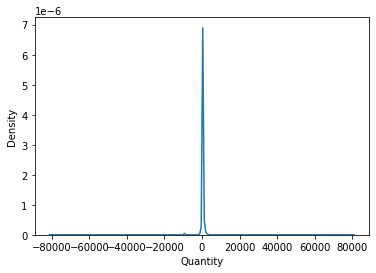

In [129]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=df1["Quantity"]);

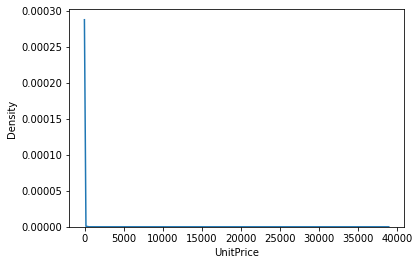

In [130]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=df1["UnitPrice"]);

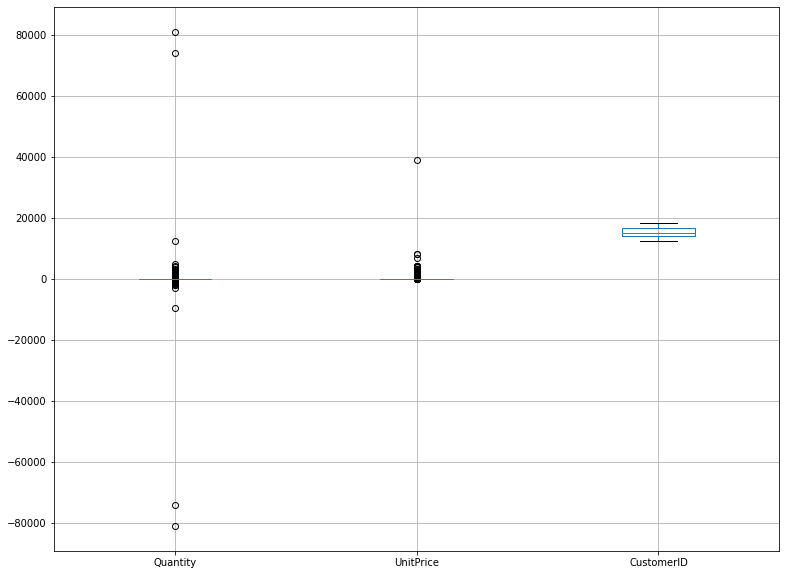

In [131]:
# vẽ biểu đồ boxplot cho các đặc trưng
plt.figure(figsize=(13,10))
df1.boxplot();

D:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


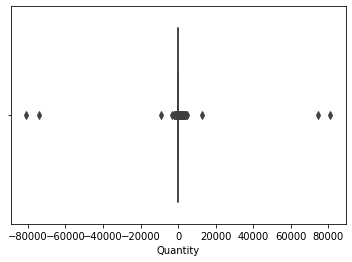

In [132]:
# vẽ biểu đồ box plot cho MonthlyIncome
sns.boxplot(df1["Quantity"]);

In [133]:
# tính giá trị Q1 và Q3
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
# tính IQR 
IQR = Q3-Q1

In [134]:
# lọc dữ liệu ngoại lai
df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp/ipykernel_11540/2034644128.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
C:\Users\Admin\AppData\Local\Temp/ipykernel_11540/2034644128.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:>

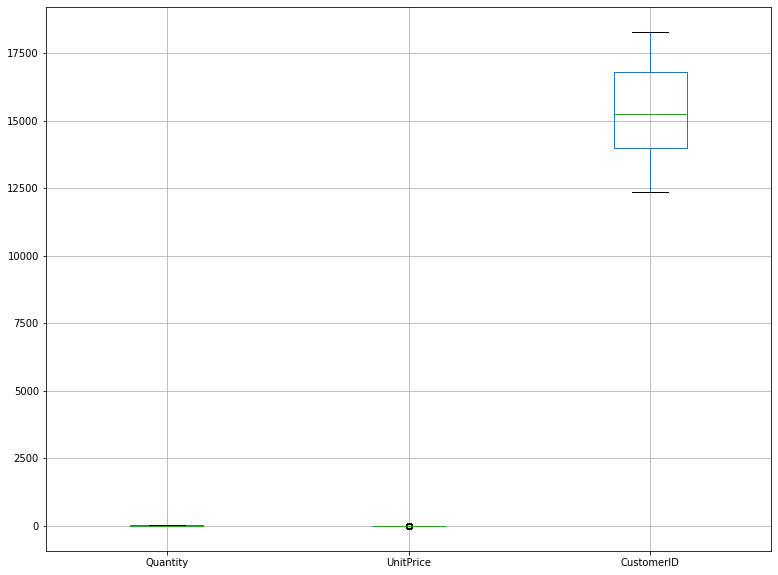

In [135]:
plt.figure(figsize=(13,10))
df2.boxplot()

In [136]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,344393.000000,344393.000000,344393.000000
mean,7.279797,2.201251,15319.637144
std,6.880816,1.548459,1711.461068
min,-13.000000,0.000000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,5.000000,1.650000,15235.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


#### Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch

#####  Chuẩn hoá trên df1 chứa dữ liệu ngoại lai

In [137]:
# chuẩn hóa với minmax scaling
scaler1 = MinMaxScaler()
mms = scaler1.fit_transform(pd.DataFrame(df1['UnitPrice']))
mms1 = scaler1.fit_transform(pd.DataFrame(df1['Quantity']))

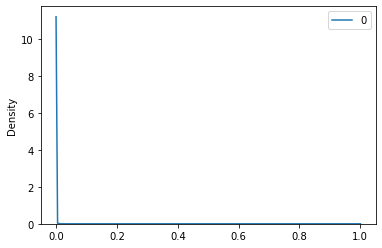

In [138]:
sns.kdeplot(data = mms);

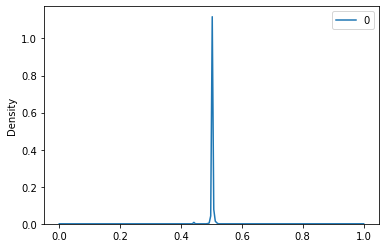

In [139]:
sns.kdeplot(data = mms1);

In [140]:
# chuẩn hóa với robust scaling
scaler2 = RobustScaler()
rbs = scaler2.fit_transform(pd.DataFrame(df1['UnitPrice']))
rbs1 = scaler2.fit_transform(pd.DataFrame(df1['Quantity']))

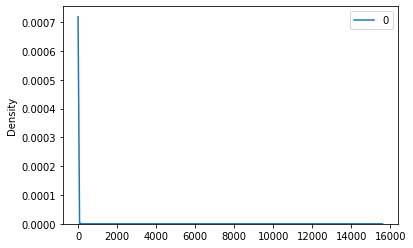

In [141]:
sns.kdeplot(data = rbs);

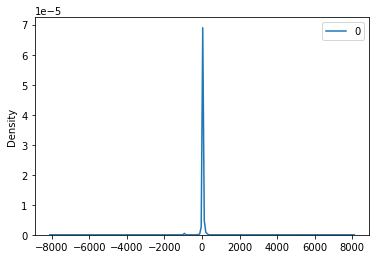

In [142]:
sns.kdeplot(data = rbs1);

In [143]:
# chuẩn hóa với standard scaling
scaler3 = StandardScaler()
sc = scaler3.fit_transform(pd.DataFrame(df1['UnitPrice']))
sc1 = scaler3.fit_transform(pd.DataFrame(df1['Quantity']))

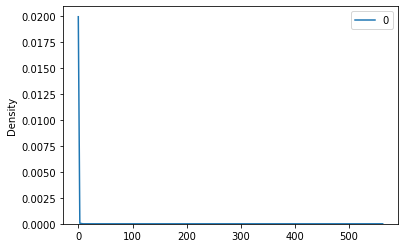

In [144]:
sns.kdeplot(data = sc);

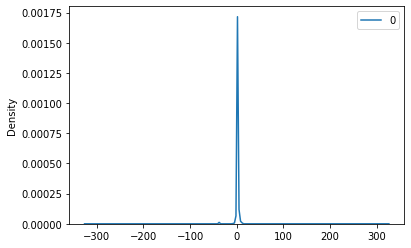

In [145]:
sns.kdeplot(data = sc1);

#####  Chuẩn hoá trên df2 chứa dữ liệu sạch

In [146]:
# chuẩn hóa với minmax scaling
scaler4 = MinMaxScaler()
mms = scaler4.fit_transform(pd.DataFrame(df2['UnitPrice']))
mms1 = scaler4.fit_transform(pd.DataFrame(df2['Quantity']))

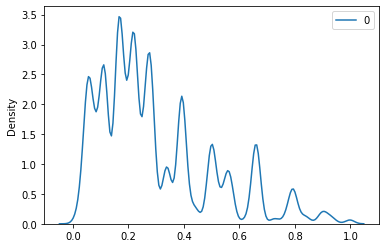

In [147]:
sns.kdeplot(data = mms);

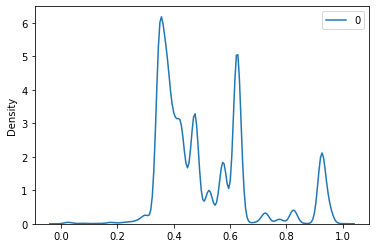

In [148]:
sns.kdeplot(data = mms1);

In [149]:
# chuẩn hóa với robust scaling
scaler5 = RobustScaler()
rbs = scaler5.fit_transform(pd.DataFrame(df2['UnitPrice']))
rbs1 = scaler5.fit_transform(pd.DataFrame(df2['Quantity']))

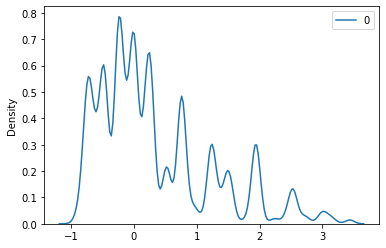

In [150]:
sns.kdeplot(data = rbs);

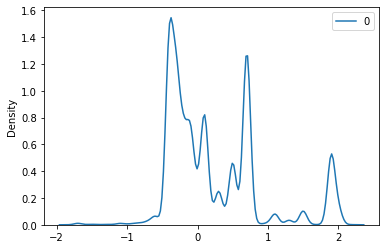

In [151]:
sns.kdeplot(data = rbs1);

In [152]:
# chuẩn hóa với standard scaling
scaler6 = StandardScaler()
sc = scaler6.fit_transform(pd.DataFrame(df2['UnitPrice']))
sc1 = scaler6.fit_transform(pd.DataFrame(df2['Quantity']))

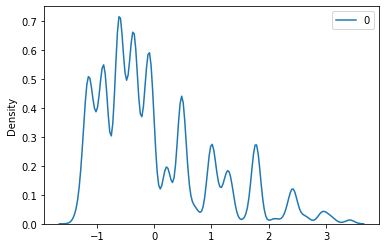

In [153]:
sns.kdeplot(data = sc);

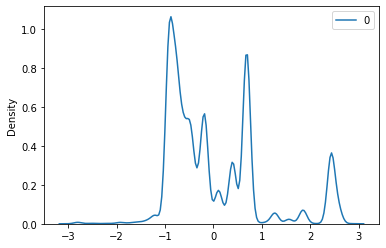

In [154]:
sns.kdeplot(data = sc1);

#### Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [155]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [156]:
df2.describe()

,Quantity,UnitPrice,CustomerID
count,344393.000000,344393.000000,344393.000000
mean,7.279797,2.201251,15319.637144
std,6.880816,1.548459,1711.461068
min,-13.000000,0.000000,12347.000000
25%,2.000000,1.250000,13988.000000
50%,5.000000,1.650000,15235.000000
75%,12.000000,2.950000,16814.000000
max,27.000000,7.500000,18287.000000


In [157]:
# Có thể nhận thấy ở cả 3 phương pháp chuẩn hóa, phân bố dữ liệu gần như được giữ nguyên, tuy nhiên khoảng giá trị giữ liệu đã thay đổi về khoảng giá trị nhỏ hơn rất nhiều so với ban đầu